# mpra_analyze_293T

Margaret Guo

08/15/2020

In [1]:
library(MPRAnalyze)
library(tidyverse)
library(pheatmap)
# library(mpra)
# library(QuASAR)
# library(BiocParallel)
# library(stringr)
# library(reshape2)
# library(ggplot2)
# library(gridExtra)
# library(VennDiagram)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
getwd()

[1] "/Users/mguo123/Google Drive/1_khavari/noncancer_project/miseq/novogene_071420"

In [3]:
# list.files(getwd())

In [4]:
count_rna = read.csv('dedup_counts/count_matrix.csv',row.names=1)
head(count_rna)

,AST_1_L1,AST_1_L2,AST_2_L1,AST_2_L2,H4_D4_1_L1,H4_D4_1_L2,H9_D0_1A_L1,H9_D0_1A_L2,H9_D0_1B_L1,H9_D0_1B_L2,⋯,SL_1_L1,SL_1_L2,SL_2_L1,SL_2_L2,SL_3A_L1,SL_3A_L2,SL_3B_L1,SL_3B_L2,SL_4_L1,SL_4_L2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr5.109076112.Ref.C.3,151,138,97,72,141,143,22,17,30,33,⋯,43,40,88,61,40,32,33,28,61,55
chr10.62185494.Ref.C.7,60,52,61,50,42,41,17,19,11,9,⋯,39,33,21,25,23,13,31,32,34,36
chr2.74455472.all_alt.T.6,529,428,104,89,332,314,119,115,106,101,⋯,193,149,163,164,107,77,131,110,232,210
chr6.27799470.all_alt.G.9,404,377,180,159,236,207,74,76,52,45,⋯,88,79,96,87,59,37,82,67,88,90
chr11.47270255.all_alt.T.8,76,76,54,41,62,49,21,17,13,8,⋯,25,23,34,34,42,39,37,38,21,19
chr10.107594646.Ref.G.10,306,276,48,52,186,181,30,26,23,26,⋯,65,57,91,82,57,53,12,9,82,84


In [5]:
colnames(count_rna)

[1] "AST_1_L1"    "AST_1_L2"    "AST_2_L1"    "AST_2_L2"    "H4_D4_1_L1" 
 [6] "H4_D4_1_L2"  "H9_D0_1A_L1" "H9_D0_1A_L2" "H9_D0_1B_L1" "H9_D0_1B_L2"
[11] "H9_D0_2_L1"  "H9_D0_2_L2"  "H9_D10_1_L1" "H9_D10_1_L2" "H9_D10_2_L1"
[16] "H9_D10_2_L2" "H9_D10_3_L1" "H9_D10_3_L2" "H9_D10_4_L1" "H9_D10_4_L2"
[21] "H9_D2_1_L1"  "H9_D2_1_L2"  "H9_D2_2_L1"  "H9_D2_2_L2"  "H9_D2_3_L1" 
[26] "H9_D2_3_L2"  "H9_D2_4_L1"  "H9_D2_4_L2"  "H9_D4_2_L1"  "H9_D4_2_L2" 
[31] "H9_D4_3A_L1" "H9_D4_3A_L2" "H9_D4_3B_L1" "H9_D4_3B_L2" "HEK293_1_L1"
[36] "HEK293_1_L2" "HEK293_2_L1" "HEK293_2_L2" "HEK293_3_L1" "HEK293_3_L2"
[41] "SLC_1_L1"    "SLC_1_L2"    "SLC_2_L1"    "SLC_2_L2"    "SLC_3_L1"   
[46] "SLC_3_L2"    "SLC_4_L1"    "SLC_4_L2"    "SL_1_L1"     "SL_1_L2"    
[51] "SL_2_L1"     "SL_2_L2"     "SL_3A_L1"    "SL_3A_L2"    "SL_3B_L1"   
[56] "SL_3B_L2"    "SL_4_L1"     "SL_4_L2"

'HEK293_1_L1'
'HEK293_1_L2'
'HEK293_2_L1'
'HEK293_2_L2'
'HEK293_3_L1'
'HEK293_3_L2'

In [13]:
get_tables = function(miseq_out){
miseq_out$id = as.character(miseq_out$id)
miseq_out = miseq_out%>%
    select(id, count)%>%
    separate(id, c("chr", "loc", "allele_info", "letter", "bc_id"), sep='[.]')%>%
    mutate(allele = ifelse(grepl("Ref",miseq_out$id),'ref','alt'))%>%
    mutate(column = str_c(allele, bc_id, sep = '_'))%>%
    mutate(snp_name = str_c(chr, loc, sep = '_'))%>%
    select(snp_name, count, column, allele, bc_id )%>%
    group_by(snp_name, column)%>%
    summarise(count = sum(count),
            allele = unique(allele),
            bc_id = unique(bc_id))%>%
    ungroup()

    colAnnon = miseq_out%>%
        select( -snp_name,-count)%>%
        mutate(barcode_allelic =  as.factor(str_c(allele, bc_id, sep = '_')))%>%
        distinct()%>%
        arrange(column)%>%
        column_to_rownames('column')
    
    countTable = miseq_out%>%
        select(-allele, -bc_id)%>%
        spread(column,count)%>%
        replace(is.na(.), 0)%>%
        arrange(snp_name)%>%
        column_to_rownames('snp_name')
#     countTable = as.matrix(countTable)
    return(list(colAnnon, countTable))
}

get_tables_withbatch = function(miseq_out){
miseq_out$id = as.character(miseq_out$id)
miseq_out = miseq_out%>%
    select(id, count,batch)%>%
    separate(id, c("chr", "loc", "allele_info", "letter", "bc_id"), sep='[.]')%>%
    mutate(allele = ifelse(grepl("Ref",miseq_out$id),'ref','alt'))%>%
    mutate(column = str_c(allele, bc_id, batch, sep = '_'))%>%
    mutate(snp_name = str_c(chr, loc, sep = '_'))%>%
    select(snp_name, count, column, allele, bc_id, batch )%>%
    group_by(snp_name, column, batch)%>%
    summarise(count = sum(count),
            allele = unique(allele),
            bc_id = unique(bc_id))%>%
    ungroup()

    colAnnon = miseq_out%>%
        select( -snp_name,-count)%>%
        mutate(barcode_allelic =  as.factor(str_c(allele, bc_id, sep = '_')))%>%
        distinct()%>%
        arrange(column)%>%
        column_to_rownames('column')

    countTable = miseq_out%>%
        select(-allele, -bc_id, -batch)%>%
        spread(column,count)%>%
        replace(is.na(.), 0)%>%
        arrange(snp_name)%>%
        column_to_rownames('snp_name')
#     countTable = as.matrix(countTable)

    return(list(colAnnon, countTable))
}

# read_rna_count_csv = function(rna_count_csv){
    
# }

In [14]:
# read in dna
dna_df = read.csv('../miseq_mg_081019/libpsych_plasmid_qc_701_501_count.csv')
result_dna = get_tables(dna_df)
colAnnon_dna = result_dna[[1]]
dnaCount = result_dna[[2]]

#### HEK293T
save_prefix = 'mpraanalyze_HEK293_'
sample_ids = c('HEK293_1', 'HEK293_2', 'HEK293_3')

#### Astrocytes (AST)
save_prefix = 'mpraanalyze_AST1_'
sample_ids = c('AST_1', 'AST_2')

#### H9-D0
save_prefix = 'mpraanalyze_H9D0_'
sample_ids = c('H9_D0_1A', 'H9_D0_1B', 'H9_D0_2')


#### H9-D2
save_prefix = 'mpraanalyze_H9D2_'
sample_ids = c('H9_D2_1', 'H9_D2_2', 'H9_D2_3', 'H9_D2_4')


#### H9-D4 (removed H9_D4_3A because of clustering issues)
save_prefix = 'mpraanalyze_H9D4_'
sample_ids = c('H4_D4_1', 'H9_D4_2', 'H9_D4_3B')


#### H9-D10 (removed H9_D10_2 because of clustering issues)
save_prefix = 'mpraanalyze_H9D10_'
sample_ids = c('H9_D10_1', 'H9_D10_4', 'H9_D10_3')


#### SL
save_prefix = 'mpraanalyze_SL_'
sample_ids = c('SL_1', 'SL_2', 'SL_3A', 'SL_3B', 'SL_4)


#### SLC
save_prefix = 'mpraanalyze_SLC_'
sample_ids = c('SLC_1', 'SLC_2', 'SLC_3',  'SLC_4)


In [15]:
# list.files('usftp1.novogene.com:26/raw_data/',pattern='*_count.csv')

'HEK293_1_L1_libpsych_novogene_undup_count.csv'
'HEK293_1_L2_libpsych_novogene_undup_count.csv'
'HEK293_2_L1_libpsych_novogene_undup_count.csv'
'HEK293_2_L2_libpsych_novogene_undup_count.csv'
'HEK293_3_L1_libpsych_novogene_undup_count.csv'
'HEK293_3_L2_libpsych_novogene_undup_count.csv'

### IMPORTANT ADD IN TISSUE SPECIFIC INFO BELOW

In [2]:
save_prefix = 'D_mpraanalyze_barcode_allelic/mpraanalyze_HEK293_'
sample_ids = c('HEK293_1', 'HEK293_2', 'HEK293_3')
tissue = 'HEK293T'


In [17]:
# rna_df_rep_L1 = read.csv(paste0('usftp1.novogene.com:26/raw_data/',sample_id,  '_L1_libpsych_novogene_undup_count.csv'))
# rna_df_rep_L1  %>%
#     group_by(name)%>%
#     summarise(num_bc = n())%>%
#     filter(num_bc>5)

In [18]:
# rna_df_rep %>%
#     separate(id, c("chr", "loc", "allele_info", "letter", "bc_id"), sep='[.]')%>%
#     group_by(chr,loc, allele_info, letter)%>%
#     summarise(num_bc = n())%>%
#     filter(num_bc>5)    

In [19]:
rna_df= data.frame()
for (sample_id in sample_ids){
    # read in each lane
    rna_df_rep_L1 = read.csv(paste0('dedup_counts/',sample_id,  '_L1_libpsych_virus_dupumi_count.csv'))
    rna_df_rep_L1 = dplyr::select(rna_df_rep_L1, id, count)
    rna_df_rep_L2 = read.csv(paste0('dedup_counts/',sample_id,  '_L2_libpsych_virus_dupumi_count.csv'))
    rna_df_rep_L2 = dplyr::select(rna_df_rep_L2, id, count)
    
    # merge lanes by summing and add a variable indicating batch
    rna_df_rep = full_join(rna_df_rep_L1,rna_df_rep_L2,by='id')
    rna_df_rep$count.x[is.na(rna_df_rep$count.x)] = 0 
    rna_df_rep$count.y[is.na(rna_df_rep$count.y)] = 0
    rna_df_rep$count= rna_df_rep$count.x +rna_df_rep$count.y
    rna_df_rep$batch= tail(strsplit(sample_id,'_')[[1]],n=1)
    
    #add to overall dataframe
    rna_df = rbind(rna_df, rna_df_rep)
    
}



Warning message:
“Column `id` joining factors with different levels, coercing to character vector”
Warning message:
“Column `id` joining factors with different levels, coercing to character vector”
Warning message:
“Column `id` joining factors with different levels, coercing to character vector”


In [20]:
# get overall dataframe and annotations

result_rna = get_tables_withbatch(rna_df)
colAnnon_rna = result_rna[[1]]
rnaCount = result_rna[[2]]


result_rna_nobatch = get_tables(rna_df)
colAnnon_rna_nobatch = result_rna_nobatch[[1]]
rnaCount_nobatch = result_rna_nobatch[[2]]

In [21]:
# filter dna for those found in rna
dnaCount_new = dnaCount %>% 
    rownames_to_column('snpname') %>%
    filter(row.names(dnaCount) %in% row.names(rnaCount))%>%
    column_to_rownames('snpname')

# filter rna for those found in dna
rnaCount_new = rnaCount %>% 
    rownames_to_column('snpname') %>%
    filter(row.names(rnaCount) %in% row.names(dnaCount_new))%>%
    column_to_rownames('snpname')


# filter rna for those found in dna
rnaCount_nobatch_new = rnaCount_nobatch %>% 
    rownames_to_column('snpname') %>%
    filter(row.names(rnaCount_nobatch) %in% row.names(dnaCount_new))%>%
    column_to_rownames('snpname')
rnaCount_nobatch_new = rnaCount_nobatch_new[rownames(dnaCount_new),colnames(dnaCount_new)]

In [22]:
dim(dnaCount)
dim(rnaCount)
dim(dnaCount_new)
dim(rnaCount_new)
dim(rnaCount_nobatch_new)

[1] 2219   20

[1] 2214   60

[1] 2212   20

[1] 2212   60

[1] 2212   20

In [23]:
head(rnaCount_new)

,alt_1_1,alt_1_2,alt_1_3,alt_10_1,alt_10_2,alt_10_3,alt_2_1,alt_2_2,alt_2_3,alt_3_1,⋯,ref_6_3,ref_7_1,ref_7_2,ref_7_3,ref_8_1,ref_8_2,ref_8_3,ref_9_1,ref_9_2,ref_9_3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_111243375,254,274,202,0,0,0,23,45,22,41,⋯,1,37,5,7,95,108,80,359,223,235
chr1_113938499,167,104,179,380,280,364,589,372,286,140,⋯,0,11,46,9,213,500,242,0,3,0
chr1_11712109,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,1,0,0,0
chr1_11831595,101,198,143,0,0,0,0,3,0,73,⋯,57,95,110,139,214,259,196,42,90,158
chr1_11831756,316,653,432,243,321,412,94,161,87,0,⋯,11,215,129,145,38,58,85,62,22,183
chr1_11831875,217,519,187,461,776,689,376,691,404,1186,⋯,468,343,1222,247,98,170,335,727,1398,1307


In [24]:
head(dnaCount_new)

,alt_1,alt_10,alt_2,alt_3,alt_4,alt_5,alt_6,alt_7,alt_8,alt_9,ref_1,ref_10,ref_2,ref_3,ref_4,ref_5,ref_6,ref_7,ref_8,ref_9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr1_111243375,217,0,89,133,44,467,76,131,32,59,111,10,140,211,334,437,170,72,23,184
chr1_113938499,122,313,347,110,10,577,94,675,200,399,208,131,378,532,9,428,0,58,180,68
chr1_11712109,0,0,0,0,0,48,0,7,63,0,48,0,33,13,0,0,0,0,0,0
chr1_11831595,14,0,0,97,0,442,107,1,72,291,79,216,181,69,178,25,151,77,495,376
chr1_11831756,708,624,185,0,0,363,169,424,204,396,235,416,227,85,418,58,199,198,144,178
chr1_11831875,337,1276,2025,2898,595,64,0,779,601,2027,1362,2159,856,1314,2090,179,715,398,77,991


# MPRAnalyze

In [25]:
# create MpraObject
obj <- MpraObject(dnaCounts = as.matrix(dnaCount_new), rnaCounts = as.matrix(rnaCount_new), #as.matrix(rnaCount_nobatch_new), 
                  dnaAnnot = colAnnon_dna, rnaAnnot = colAnnon_rna)#colAnnon_rna_nobatch)

In [26]:
# ## Data Normalization
# ## If the library factors are different for the DNA and RNA data, separate 
# ## estimation of these factors is needed. We can also change the estimation 
# ## method (Upper quartile by default)
obj <- estimateDepthFactors(obj, #lib.factor = c("allele", "bc_id"),
                            which.lib = "dna", 
                            depth.estimator = "uq")

obj <- estimateDepthFactors(obj, lib.factor = c("batch"),#lib.factor = c("allele"),
                            which.lib = "rna", 
                            depth.estimator = "uq")
# obj <- estimateDepthFactors(obj, lib.factor = c("allele"),
#                             which.lib = "rna", 
#                             depth.estimator = "uq")


## Quantitative Analysis
These estimates can then be used to identify and classify SNPs that induce a higher transcription rate (ASE aka Allele specific expression)

In [27]:
# obj <- analyzeQuantification(obj = obj, 
#                               dnaDesign = ~ bc_id + allele,
#                               rnaDesign = ~ allele+batch)

We can now extract the transcription rate estimates from the model, denoted ‘alpha values’ in the MPRAnalyze model, and use the testing functionality to test for activtiy. extracting alpha values is done with the getAlpha function, that will provide separate values per-factor if a factor is provided. In this case we want a separate alpha estimate by condition:

In [28]:
# ##extract alpha values from the fitted model
# alpha <- getAlpha(obj, by.factor = "allele")
# ##visualize the estimates
# par(bg='white')
# boxplot(alpha)

## Comparative Analysis
MPRAnalyze also supports comparative analyses, in this case: identifying enhancers that are differentially active between conditions. While we can do this indirectly by taking the quantification results and identify enhancers that are active in one condition but not the other, a direct compartive analysis is more sensitive, and allows identification of enhancers that are more or less active, avoiding the binarization of activity. MPRAnalyze also leverages negative controls to estbalish the null differential behavior, thereby correcting any systemic bias that may be present in the data. In terms of syntax, this analysis is done very similarly to quantification, with an additional reduced model that describes the null hypothesis. In this case, the null hypothesis is no differential activtiy between conditions, so the reduced model is an empty model (intercept only)

2212 steps for model takes around ~5 min to run

In [31]:
ptm <- proc.time()
obj <- supressMessagesanalyzeComparative(obj = obj, 
                          dnaDesign = ~ barcode_allelic,
                          rnaDesign = ~ allele, 
                          reducedDesign = ~ 1)
proc.time() - ptm
##

Fitting model...


[--------------------------------------------------------------]   0% (2/2212)

[--------------------------------------------------------------]   0% (3/2212)

[--------------------------------------------------------------]   0% (4/2212)

[--------------------------------------------------------------]   0% (5/2212)

[--------------------------------------------------------------]   0% (6/2212)

[--------------------------------------------------------------]   0% (7/2212)

[--------------------------------------------------------------]   0% (8/2212)

[--------------------------------------------------------------]   0% (9/2212)

[-------------------------------------------------------------]   0% (10/2212)

[-------------------------------------------------------------]   0% (11/2212)

[-------------------------------------------------------------]   1% (12/2212)

[-------------------------------------------------------------]   1% (13/2212)

[--------------------

    user   system  elapsed 
1225.897   22.378 1255.252 

In [33]:
# with the fitted model, we can now test for differential activity, by calling testLrt
res <- testLrt(obj)

Performing Likelihood Ratio Test...



In [34]:
head(res)
summary(res)

,statistic,pval,fdr,df.test,df.dna,df.rna.full,df.rna.red,logFC
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
chr1_111243375,6.5762068914,0.01033509,0.07085744,1,20,3,2,-0.95540174
chr1_113938499,2.8161201547,0.09332173,0.28302800,1,20,3,2,-0.44687508
chr1_11712109,0.0009624826,0.97525048,1.00000000,1,8,3,2,0.02545153
chr1_11831595,4.7096740114,0.02999334,0.14026483,1,18,3,2,-0.66729175
chr1_11831756,0.5957182435,0.44021639,0.69796760,1,19,3,2,-0.18413471
chr1_11831875,6.2233671432,0.01260751,0.08250833,1,20,3,2,0.70261800


   statistic             pval              fdr            df.test      
 Min.   :-18.4471   Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:  0.2297   1st Qu.:0.04677   1st Qu.:0.1868   1st Qu.:1.0000  
 Median :  1.2581   Median :0.26201   Median :0.5238   Median :1.0000  
 Mean   :  3.2414   Mean   :0.35474   Mean   :0.5120   Mean   :0.9892  
 3rd Qu.:  3.9536   3rd Qu.:0.63177   3rd Qu.:0.8422   3rd Qu.:1.0000  
 Max.   :107.6579   Max.   :1.00000   Max.   :1.0000   Max.   :1.0000  
                                                                       
     df.dna      df.rna.full      df.rna.red     logFC         
 Min.   : 3.0   Min.   :2.000   Min.   :2    Min.   :-8.21163  
 1st Qu.:17.0   1st Qu.:3.000   1st Qu.:2    1st Qu.:-0.44465  
 Median :19.0   Median :3.000   Median :2    Median :-0.08568  
 Mean   :17.6   Mean   :2.989   Mean   :2    Mean   :-0.11602  
 3rd Qu.:20.0   3rd Qu.:3.000   3rd Qu.:2    3rd Qu.: 0.23533  
 Max.   :21.0   Max.   :3.000   Max.   :

In [35]:
# for filtering out the snps with < 5 bc
bc_filt_num = 3
rna_df_up_filt = rna_df%>%
    separate(id, c("chr", "loc", "allele_info", "letter", "bc_id"), sep='[.]')%>%
    group_by(chr,loc, allele_info, letter)%>%
    summarise(num_bc = n())%>%
    ungroup()%>%
    filter(num_bc>bc_filt_num) %>%
    mutate(snp_name = str_c(chr, loc, sep = '_'))
snp_names_up_filt = rna_df_up_filt$snp_name
length(snp_names_up_filt)

[1] 4317

In [51]:
rna_df_up_filt

chr,loc,allele_info,letter,num_bc,snp_name
<chr>,<chr>,<chr>,<chr>,<int>,<chr>
chr1,111243375,all_alt,G,27,chr1_111243375
chr1,111243375,Ref,C,27,chr1_111243375
chr1,113938499,all_alt,C,30,chr1_113938499
chr1,113938499,Ref,T,25,chr1_113938499
chr1,11712109,all_alt,T,5,chr1_11712109
chr1,11712109,Ref,C,12,chr1_11712109
chr1,11831595,all_alt,A,19,chr1_11831595
chr1,11831595,Ref,G,29,chr1_11831595
chr1,11831756,all_alt,G,24,chr1_11831756


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00   24.00   27.00   25.27   30.00   30.00 

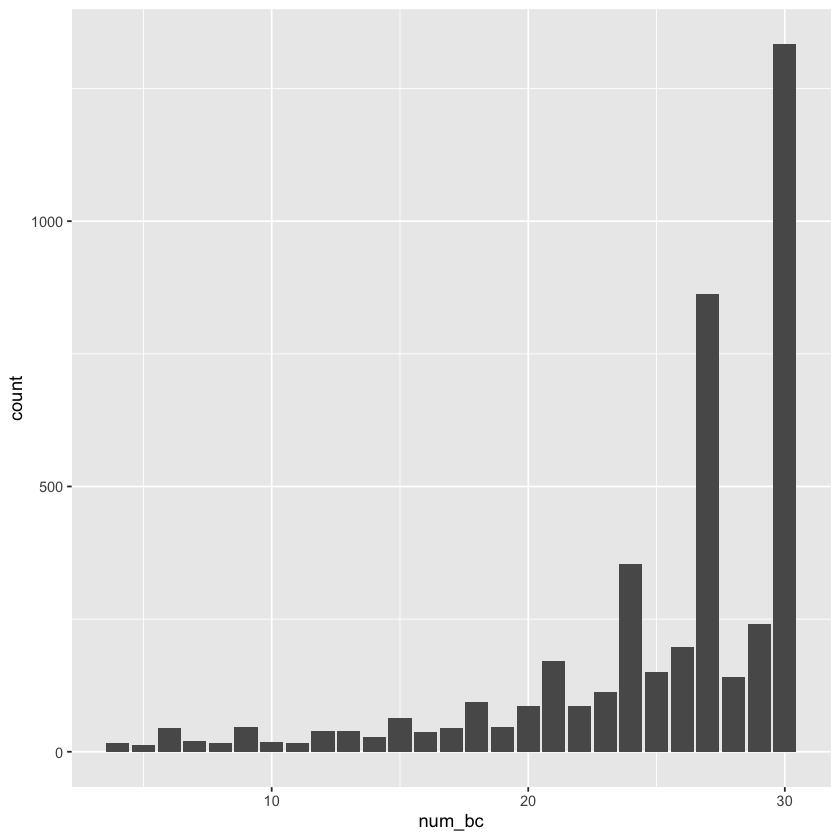

In [36]:
summary(rna_df_up_filt$num_bc)
ggplot(rna_df_up_filt,aes(x=num_bc))+geom_bar()

In [37]:
# # METHOD 1 dna normalized fold change
# res$normalt = log2(rowSums(rnaCount_nobatch_new[,1:10]+1)/rowSums(dnaCount_new[,1:10]+1))
# res$normref = log2(rowSums(rnaCount_nobatch_new[,11:20]+1)/rowSums(dnaCount_new[,11:20]+1))
# res$logFC = log2(res$normalt/res$normref)

#METHOD 2: just log2 ref/alt in rna
# res$logFC = log2(rowSums(rnaCount_nobatch_new[,1:10]+1)/rowSums(rnaCount_nobatch_new[,11:20]+1))

# # trimming
# res$pval =  pmax(res$pval, 1e-6)
# res$logFC =  pmin(res$logFC, 10)
# res$logFC =  pmax(res$logFC, 1e-6)

In [38]:
res = res%>%
    rownames_to_column()%>%
    
    mutate(neglog10_p = -log10(pval))%>%
    mutate(neglog10_p_x_logFC = neglog10_p*logFC)%>%
    arrange(desc(neglog10_p_x_logFC))%>%
    drop_na()


In [39]:
summary(res)

   rowname            statistic             pval              fdr        
 Length:2188        Min.   :-18.4471   Min.   :0.00000   Min.   :0.0000  
 Class :character   1st Qu.:  0.2455   1st Qu.:0.04573   1st Qu.:0.1847  
 Mode  :character   Median :  1.2942   Median :0.25527   Median :0.5157  
                    Mean   :  3.2769   Mean   :0.34766   Mean   :0.5067  
                    3rd Qu.:  3.9914   3rd Qu.:0.62030   3rd Qu.:0.8360  
                    Max.   :107.6579   Max.   :1.00000   Max.   :1.0000  
    df.test      df.dna       df.rna.full   df.rna.red     logFC         
 Min.   :1   Min.   : 3.00   Min.   :3    Min.   :2    Min.   :-8.21163  
 1st Qu.:1   1st Qu.:17.00   1st Qu.:3    1st Qu.:2    1st Qu.:-0.44465  
 Median :1   Median :19.00   Median :3    Median :2    Median :-0.08568  
 Mean   :1   Mean   :17.71   Mean   :3    Mean   :2    Mean   :-0.11602  
 3rd Qu.:1   3rd Qu.:20.00   3rd Qu.:3    3rd Qu.:2    3rd Qu.: 0.23533  
 Max.   :1   Max.   :21.00   Max.   :3

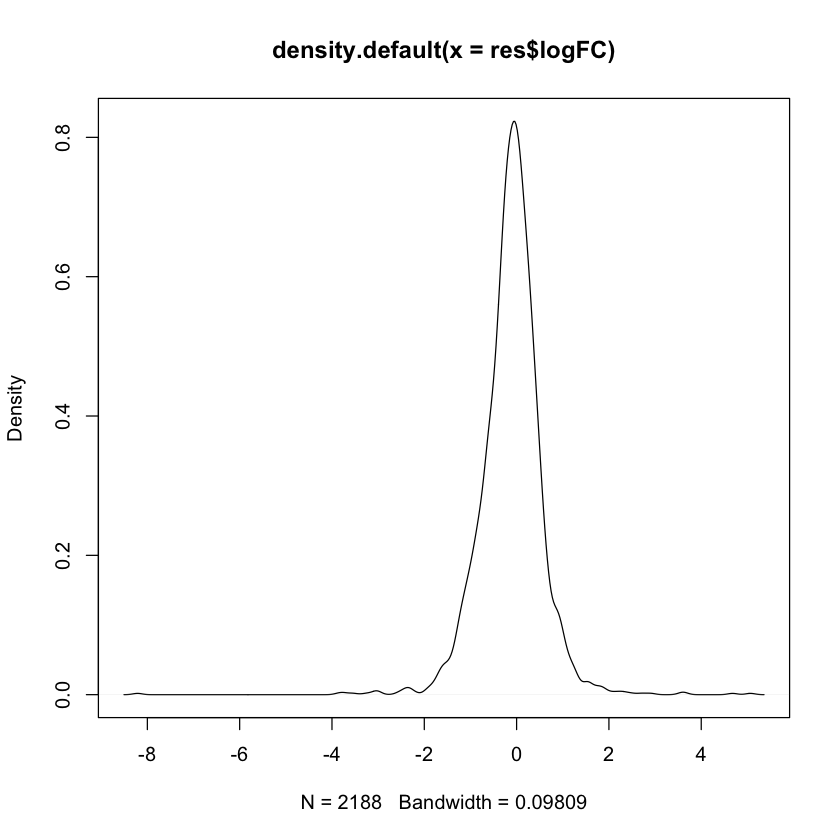

In [40]:
# When the hypothesis teseting is simple (two-condition comparison), a fold-change estimate is also available:

## plot log Fold-Change
par(bg='white')
plot(density(res$logFC))

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Saving 7 x 7 in image

Warning message:
“Removed 2 rows containing missing values (geom_point).”


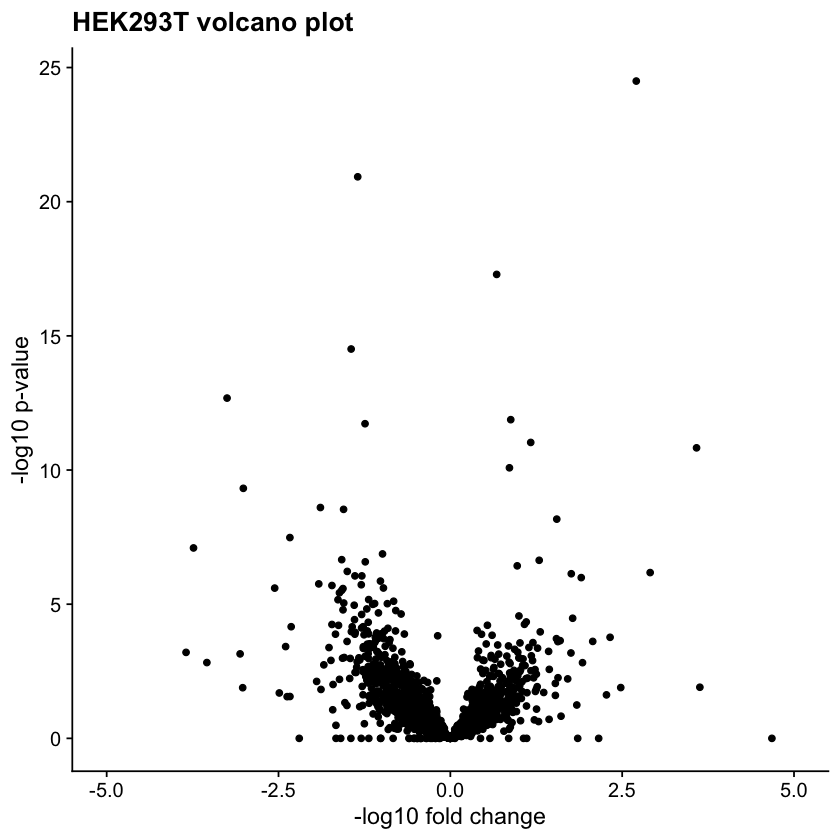

In [77]:
## plot volcano
# pdf(paste0(save_prefix, 'volcano.pdf'))
# par(bg='white')

ggplot(res, aes(x=logFC, y = -log10(pval))) + geom_point()+
  labs(x = "-log10 fold change", y = "-log10 p-value",
       title = paste0(tissue, " volcano plot")) + xlim(-5, 5)+
  cowplot::theme_cowplot()
# plot(res$logFC, -log10(res$pval),title(paste0(tissue, 'Volcano Plot')))
ggsave(paste0(save_prefix, 'volcano.pdf'))

# dev.off()

Saving 7 x 7 in image



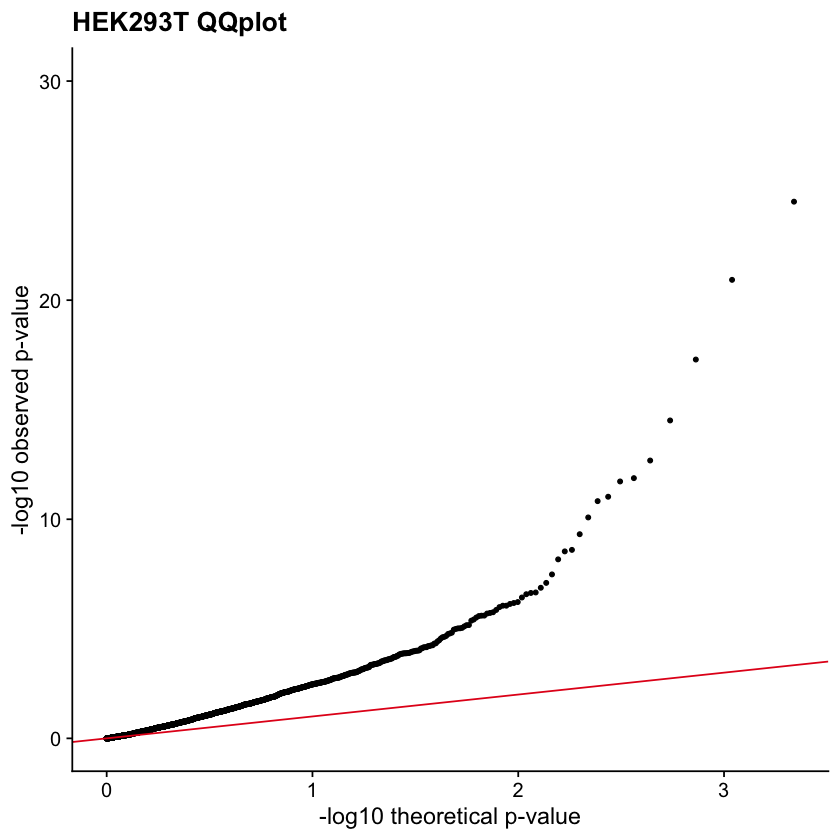

In [60]:
## plot qqplot

# pdf(paste0(save_prefix, 'volcano.pdf'))
par(bg='white')
qq_df = data.frame(emp_pval = sort(res$pval))

qq_df$theoretical_quantile = cume_dist(qq_df$emp_pval)

ggplot(qq_df, aes(x = -log10(theoretical_quantile), y = -log10(emp_pval)))+
    geom_point(size=1) +
    geom_abline(slope=1, intercept = 0, color = scales::brewer_pal(palette = "Set1")(1)[1]) +
  labs(x = "-log10 theoretical p-value", y = "-log10 observed p-value",
       title = paste0(tissue, " QQ-plot")) +  ylim(0, 30)+
  cowplot::theme_cowplot()
                                                        
ggsave(paste0(save_prefix, 'qqplot.pdf'))
# plot(1:length(-log10(res$pval)), -log10(res$pval))

# dev.off()

# annotate

In [42]:
library(tidyverse)

In [5]:
res = read.csv('D_mpraanalyze_barcode_allelic//mpraanalyze_HEK293_comp.csv')

In [6]:
lib_csv = '../../psych_lib_info.csv'
lib_df = read.csv(lib_csv)
lib_df = mutate(lib_df, name_abbr = str_c(Chr, Position, sep='_'))
head(lib_df)

,X.1,name,X,Linked_SNP,Chr,Position,Index_SNP,Disease,DHS_tissue,eGene,⋯,dbscSNV.ada_score,dbscSNV.rf_score,RawScore,PHRED,num_disease,disease_interest,pass_thres_low,pass_thres,CADD_score_bool,name_abbr
,<int>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
1,1,chr1.111243375.all_alt.G,75004,rs12085135,chr1,111243375,rs12061304,panic disorder,t-helper_17_cell,,⋯,NA,NA,-0.197208,0.728,1,TRUE,TRUE,FALSE,NA,chr1_111243375
2,2,chr1.111243375.Ref.C,75004,rs12085135,chr1,111243375,rs12061304,panic disorder,t-helper_17_cell,,⋯,NA,NA,-0.197208,0.728,1,TRUE,TRUE,FALSE,NA,chr1_111243375
3,3,chr1.113938499.all_alt.C,1977,rs74395031,chr1,113938499,rs115870915,"type 2 diabetes,Obsessive Compulsive Disorder",astrocyte_of_the_spinal_cord,NA,⋯,NA,NA,0.309426,7.336,1,TRUE,TRUE,TRUE,NA,chr1_113938499
4,4,chr1.113938499.Ref.T,1977,rs74395031,chr1,113938499,rs115870915,"type 2 diabetes,Obsessive Compulsive Disorder",astrocyte_of_the_spinal_cord,NA,⋯,NA,NA,0.309426,7.336,1,TRUE,TRUE,TRUE,NA,chr1_113938499
5,5,chr1.11712109.all_alt.T,569,rs2103665,chr1,11712109,rs115049252,schizo,spleen,NA,⋯,NA,NA,0.193843,5.751,1,FALSE,TRUE,TRUE,NA,chr1_11712109
6,6,chr1.11712109.Ref.C,569,rs2103665,chr1,11712109,rs115049252,schizo,spleen,NA,⋯,NA,NA,0.193843,5.751,1,FALSE,TRUE,TRUE,NA,chr1_11712109


In [7]:
# save_prefix ='mpraanalyze_HEK293_'
# res = read.csv('mpraanalyze_HEK293_comp.csv')
thres = 0.05/dim(res)[1]
res_filt = res %>%
#     filter(pval < thres)
    filter(fdr<0.05)
#     filter(pval<0.05)
dim(res)
dim(res_filt)

[1] 2188   12

[1] 273  12

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”
Saving 7 x 7 in image

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


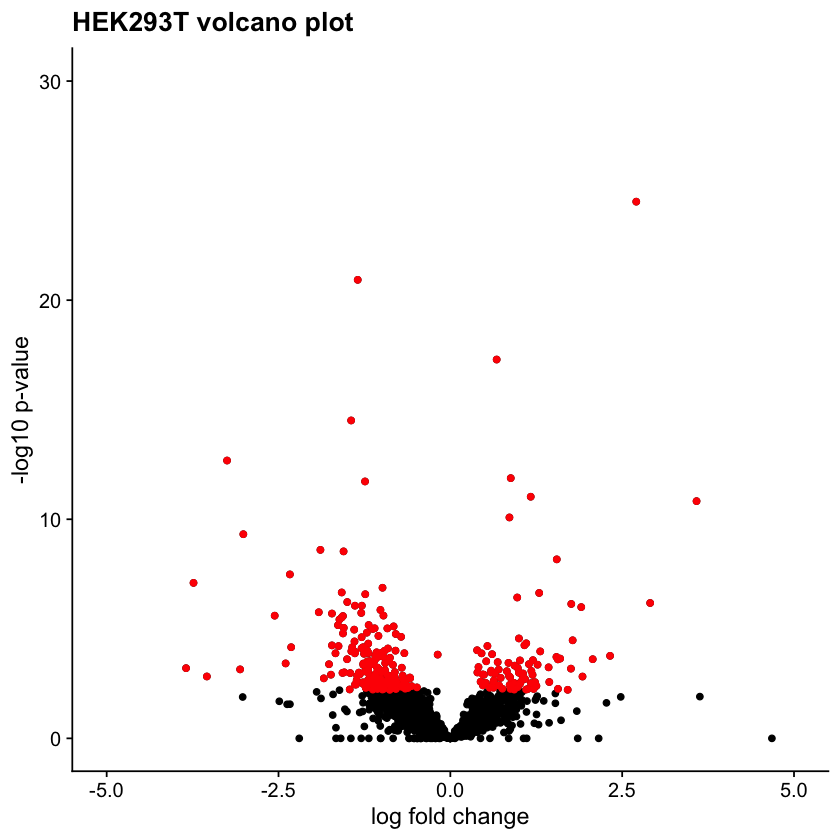

In [8]:
## plot volcano
# pdf(paste0(save_prefix, 'volcano.pdf'))
# par(bg='white')

ggplot(res, aes(x=logFC, y = -log10(pval))) + geom_point()+
 geom_point(data=res_filt, color='red')+
  labs(x = "log fold change", y = "-log10 p-value",
       title = paste0(tissue, " volcano plot")) + xlim(-5, 5)+ ylim(0,30)+
  cowplot::theme_cowplot()
# plot(res$logFC, -log10(res$pval),title(paste0(tissue, 'Volcano Plot')))
ggsave(paste0(save_prefix, 'volcano.pdf'))

# dev.off()

In [9]:
res_filt%>% arrange(rowname)#%>%select(rowname)

X,rowname,statistic,pval,fdr,df.test,df.dna,df.rna.full,df.rna.red,logFC,neglog10_p,neglog10_p_x_logFC
<int>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
2033,chr1_11832623,9.147416,2.490695e-03,2.930542e-02,1,20,3,2,-0.8828392,2.603679,-2.298630
2133,chr1_11834765,18.086490,2.110939e-05,9.529382e-04,1,19,3,2,-1.0463993,4.675524,-4.892465
98,chr1_11839966,9.310472,2.278477e-03,2.743748e-02,1,17,3,2,0.6337647,2.642355,1.674631
2079,chr1_11839971,13.221567,2.767462e-04,6.261343e-03,1,16,3,2,-0.8913000,3.557918,-3.171173
2028,chr1_11840862,9.795644,1.749257e-03,2.296529e-02,1,19,3,2,-0.8173738,2.757146,-2.253619
2174,chr1_11843840,22.585045,2.010435e-06,1.434543e-04,1,20,3,2,-1.7225924,5.696710,-9.813109
39,chr1_11858036,8.980544,2.728693e-03,3.079525e-02,1,18,3,2,1.2319998,2.564045,3.158903
47,chr1_11867652,8.795227,3.020197e-03,3.243046e-02,1,16,3,2,1.1730254,2.519965,2.955983
11,chr1_11874855,14.121729,1.713530e-04,4.459209e-03,1,14,3,2,2.3240266,3.766108,8.752536


In [10]:
res_filt = res_filt %>%
    left_join(lib_df, by=c('rowname'='name_abbr'))

Warning message:
“Column `rowname`/`name_abbr` joining factor and character vector, coercing into character vector”


In [11]:
write.csv(res,paste0(save_prefix, 'comp.csv'))
write.csv(res_filt,paste0(save_prefix, 'comp_filt.csv'))


In [12]:
sort(unique(res_filt$GeneName))

[1] AC012603.1      AC096559.1      ACP2            ADH1A          
  [5] ADH6            AF213884.2      AGPAT1          AKT1           
  [9] ALMS1           ANK3            APOM            ARNT2          
 [13] B3GALT5         C14orf166B      C1orf167        C1orf54        
 [17] C9orf78         CACNA1D         CAMTA1          CCAR2          
 [21] CD226           CKAP5           CLYBL           CSMD1          
 [25] CSMD2           CTB-127C13.1    CTC-293G12.1    CTD-2035E11.5  
 [29] CUL3            CWC22           CYP17A1-AS1     DCC            
 [33] DGKZ            DNAJA3          DTL             DUPD1          
 [37] EIF1AD          ENOX1           EP300           FABP6          
 [41] FADS2           FANCA           FGFR1           FYN            
 [45] GPHN            GPSM3           HCG4            HHAT           
 [49] HIST1H1B        HIST1H2AK       HIST1H2BL       HIST1H2BM      
 [53] HLA-B           ITIH1           KARSP3          KDM4C          
 [57] KIAA1279        LPPR5           MAP3K8          MAP7D1         
 [61] MAS1L           MFAP3L          MIR135A1        MTHFR          
 [65] MYBPC3          MYO1H           MYRF            NAGA           
 [69] NCALD           NDRG4           NEK1            NFATC3         
 [73] NFKB1           NLGN1           NPPA-AS1        NXN            
 [77] PARK7           PBX2            PCDHA1          PCDHA4         
 [81] PCDHA5          PCNX            PEMT            PIK3C2A        
 [85] PKP1            PLAA            PLN             PMFBP1         
 [89] PNMT            PPT2            PRODH           PRRG2          
 [93] PRTFDC1         PSD3            RASGRP3         RERE           
 [97] RN7SL100P       RNA5SP492       RNF24           RNU6-468P      
[101] RP1-155G6.4     RP11-112J1.2    RP11-112J1.3    RP11-325K19.1  
[105] RP11-350N15.3   RP11-354P11.8   RP11-375D13.2   RP11-37B2.1    
[109] RP11-384J4.2    RP11-431K24.1   RP11-474G23.3   RP11-513D5.2   
[113] RP11-56N19.5    RP11-696N14.1   RP11-99J16__A.2 RP13-631K18.2  
[117] RP3-413H6.2     RP4-555D20.3    RP5-1115A15.1   RP5-850O15.3   
[121] RSRC1           RTTN            SHANK2          SHISA9         
[125] SLC30A9         SLC6A4          SMEK1           SMOX           
[129] snoU13          SPATS2L         ST3GAL4         STOML1         
[133] SZT2            TBC1D15         TMEM106B        TMEM129        
[137] TMEM63C         TRHDE           TRIM58          TTC7B          
[141] TYMP            UBE2D3          UFL1-AS1        UST            
[145] VTRNA1-3        ZDHHC5          ZKSCAN4         ZMAT2          
[149] ZMYND10        
641 Levels: ABCG1 AC002465.2 AC002480.2 AC002480.4 AC005076.5 ... ZSCAN31